In [2]:
import numpy as np
import pandas as pd
from cleaned import*
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
qb

,Unnamed: 0,Pos,Year,Week,Team,Opponent Abbrev,Date,H/A,OT,Team Score,...,Pass Rate,Rush Att,Rush Yds,Rush TD,Rush Lng,Fmb,FL,2PT,Off Num,Off Pct
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,0,QB,2019,1,GNB,CHI,9/5/2019,A,NaN,10,...,91.4,3,8,0,10,0,0,0,61,100%
Mitchell Trubisky,9,QB,2019,1,CHI,GNB,9/5/2019,H,NaN,3,...,62.1,3,11,0,7,0,0,0,71,100%
Marcus Mariota,19,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,...,133.3,3,24,0,13,0,0,0,57,97%
Ryan Tannehill,29,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,...,0.0,2,-2,0,-1,0,0,0,2,3%
Baker Mayfield,31,QB,2019,1,CLE,TEN,9/8/2019,H,NaN,13,...,64.0,0,0,0,0,0,0,0,71,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joe Webb,26225,QB,2015,17,CAR,TAM,1/3/2016,H,NaN,38,...,0.0,0,0,0,0,0,0,0,0,0%
Derek Carr,26226,QB,2015,17,OAK,KAN,1/3/2016,A,NaN,17,...,77.1,2,12,0,7,2,0,0,57,100%
Alex Smith,26237,QB,2015,17,KAN,OAK,1/3/2016,H,NaN,23,...,70.8,9,61,0,22,0,0,0,65,100%


In [4]:
qb.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
qb

,Pos,Year,Week,Team,Opponent Abbrev,Date,H/A,OT,Team Score,Opponent Score,...,Pass Rate,Rush Att,Rush Yds,Rush TD,Rush Lng,Fmb,FL,2PT,Off Num,Off Pct
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,QB,2019,1,GNB,CHI,9/5/2019,A,NaN,10,3,...,91.4,3,8,0,10,0,0,0,61,100%
Mitchell Trubisky,QB,2019,1,CHI,GNB,9/5/2019,H,NaN,3,10,...,62.1,3,11,0,7,0,0,0,71,100%
Marcus Mariota,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,13,...,133.3,3,24,0,13,0,0,0,57,97%
Ryan Tannehill,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,13,...,0.0,2,-2,0,-1,0,0,0,2,3%
Baker Mayfield,QB,2019,1,CLE,TEN,9/8/2019,H,NaN,13,43,...,64.0,0,0,0,0,0,0,0,71,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joe Webb,QB,2015,17,CAR,TAM,1/3/2016,H,NaN,38,10,...,0.0,0,0,0,0,0,0,0,0,0%
Derek Carr,QB,2015,17,OAK,KAN,1/3/2016,A,NaN,17,23,...,77.1,2,12,0,7,2,0,0,57,100%
Alex Smith,QB,2015,17,KAN,OAK,1/3/2016,H,NaN,23,17,...,70.8,9,61,0,22,0,0,0,65,100%


In [6]:
qb['fantasy_points'] = 0
for i, row in qb.iterrows():
    fantasy_points = ((qb.at[i,'Pass Yds']/25) + (qb.at[i,'Pass TD']*4) + (qb.at[i, 'Rush Yds']/10) + (qb.at[i, 'Rush TD']*10) + (qb.at[i, '2PT']*2)) - ((qb.at[i, 'Pass Int']*2)+(qb.at[i, 'FL']*2))
    qb.at[i, 'fantasy_points'] = fantasy_points
    

In [7]:
qb

,Pos,Year,Week,Team,Opponent Abbrev,Date,H/A,OT,Team Score,Opponent Score,...,Rush Att,Rush Yds,Rush TD,Rush Lng,Fmb,FL,2PT,Off Num,Off Pct,fantasy_points
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,QB,2019,1,GNB,CHI,9/5/2019,A,NaN,10,3,...,3,8,0,10,0,0,0,61,100%,12
Mitchell Trubisky,QB,2019,1,CHI,GNB,9/5/2019,H,NaN,3,10,...,3,11,0,7,0,0,0,71,100%,8
Marcus Mariota,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,13,...,3,24,0,13,0,0,0,57,97%,24
Ryan Tannehill,QB,2019,1,TEN,CLE,9/8/2019,A,NaN,43,13,...,2,-2,0,-1,0,0,0,2,3%,0
Baker Mayfield,QB,2019,1,CLE,TEN,9/8/2019,H,NaN,13,43,...,0,0,0,0,0,0,0,71,100%,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Joe Webb,QB,2015,17,CAR,TAM,1/3/2016,H,NaN,38,10,...,0,0,0,0,0,0,0,0,0%,0
Derek Carr,QB,2015,17,OAK,KAN,1/3/2016,A,NaN,17,23,...,2,12,0,7,2,0,0,57,100%,10
Alex Smith,QB,2015,17,KAN,OAK,1/3/2016,H,NaN,23,17,...,9,61,0,22,0,0,0,65,100%,16


In [20]:
#created a dictionary for easy recall
top_20 = {'mahomes':'Patrick Mahomes',
          'jackson':'Lamar Jackson',
          'wilson':'Russell Wilson',
          'prescott':'Dak Prescott',
          'murray':'Kyler Murray',
          'watson':'Deshaun Watson',
          'brees':'Drew Brees',
          'ryan':'Matt Ryan',
          'brady':'Tom Brady',
          'rodgers':'Aaron Rodgers',
          'allen':'Josh Allen',
          'stafford':'Matthew Stafford',
          'wentz':'Carson Wentz',
          'jones':'Daniel Jones',
          'newton':'Cam Newton',
          'roethlisberger':'Ben Roethlisberger',
          'goff':'Jared Goff',
          'mayfield':'Baker Mayfield',
          'tannehill':'Ryan Tannehill',
          'rivers':'Philip Rivers'}

In [9]:
mahomes = qb.loc['Patrick Mahomes', :]
mahomes

,Pos,Year,Week,Team,Opponent Abbrev,Date,H/A,OT,Team Score,Opponent Score,...,Rush Att,Rush Yds,Rush TD,Rush Lng,Fmb,FL,2PT,Off Num,Off Pct,fantasy_points
Player,,,,,,,,,,,,,,,,,,,,,
Patrick Mahomes,QB,2019,1,KAN,JAX,9/8/2019,A,NaN,40,26,...,1,2,0,2,0,0,0,59,87%,27
Patrick Mahomes,QB,2019,2,KAN,OAK,9/15/2019,A,NaN,28,10,...,1,-1,0,-1,1,1,0,75,100%,31
Patrick Mahomes,QB,2019,3,KAN,BAL,9/22/2019,H,NaN,33,28,...,4,9,0,11,1,0,0,68,100%,27
Patrick Mahomes,QB,2019,4,KAN,DET,9/29/2019,A,NaN,34,30,...,6,54,0,25,0,0,0,68,100%,18
Patrick Mahomes,QB,2019,5,KAN,IND,10/6/2019,H,NaN,13,19,...,3,17,0,14,0,0,0,61,100%,18
Patrick Mahomes,QB,2019,6,KAN,HOU,10/13/2019,H,NaN,24,31,...,1,-1,0,-1,1,1,0,55,100%,18
Patrick Mahomes,QB,2019,7,KAN,DEN,10/17/2019,A,NaN,30,6,...,1,2,0,2,0,0,0,20,33%,7
Patrick Mahomes,QB,2019,10,KAN,TEN,11/10/2019,A,NaN,32,35,...,0,0,0,0,0,0,0,82,100%,29
Patrick Mahomes,QB,2019,11,KAN,LAC,11/18/2019,A,NaN,24,17,...,5,59,0,24,0,0,0,67,100%,15


In [10]:
mahomes['Date'] = pd.to_datetime(mahomes.Date)

C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
mahomes.sort_values(by=['Date'], inplace=True)
mahomes

C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pos,Year,Week,Team,Opponent Abbrev,Date,H/A,OT,Team Score,Opponent Score,...,Rush Att,Rush Yds,Rush TD,Rush Lng,Fmb,FL,2PT,Off Num,Off Pct,fantasy_points
Player,,,,,,,,,,,,,,,,,,,,,
Patrick Mahomes,QB,2017,17,KAN,DEN,2017-12-31,A,NaN,27,24,...,7,10,0,5,0,0,0,62,94%,10
Patrick Mahomes,QB,2018,1,KAN,LAC,2018-09-09,A,NaN,38,28,...,5,21,0,8,0,0,0,56,100%,28
Patrick Mahomes,QB,2018,2,KAN,PIT,2018-09-16,A,NaN,42,37,...,5,18,0,10,1,0,0,58,100%,38
Patrick Mahomes,QB,2018,3,KAN,SFO,2018-09-23,H,NaN,38,27,...,5,7,0,7,1,0,0,75,100%,25
Patrick Mahomes,QB,2018,4,KAN,DEN,2018-10-01,A,NaN,27,23,...,3,7,1,8,1,0,0,78,100%,26
Patrick Mahomes,QB,2018,5,KAN,JAX,2018-10-07,H,NaN,30,14,...,4,13,1,11,0,0,0,70,100%,19
Patrick Mahomes,QB,2018,6,KAN,NWE,2018-10-14,A,NaN,40,43,...,2,9,0,6,0,0,0,54,100%,26
Patrick Mahomes,QB,2018,7,KAN,CIN,2018-10-21,H,NaN,45,10,...,4,45,0,23,2,0,0,70,100%,32
Patrick Mahomes,QB,2018,8,KAN,DEN,2018-10-28,H,NaN,30,23,...,2,-1,0,1,0,0,0,58,100%,26


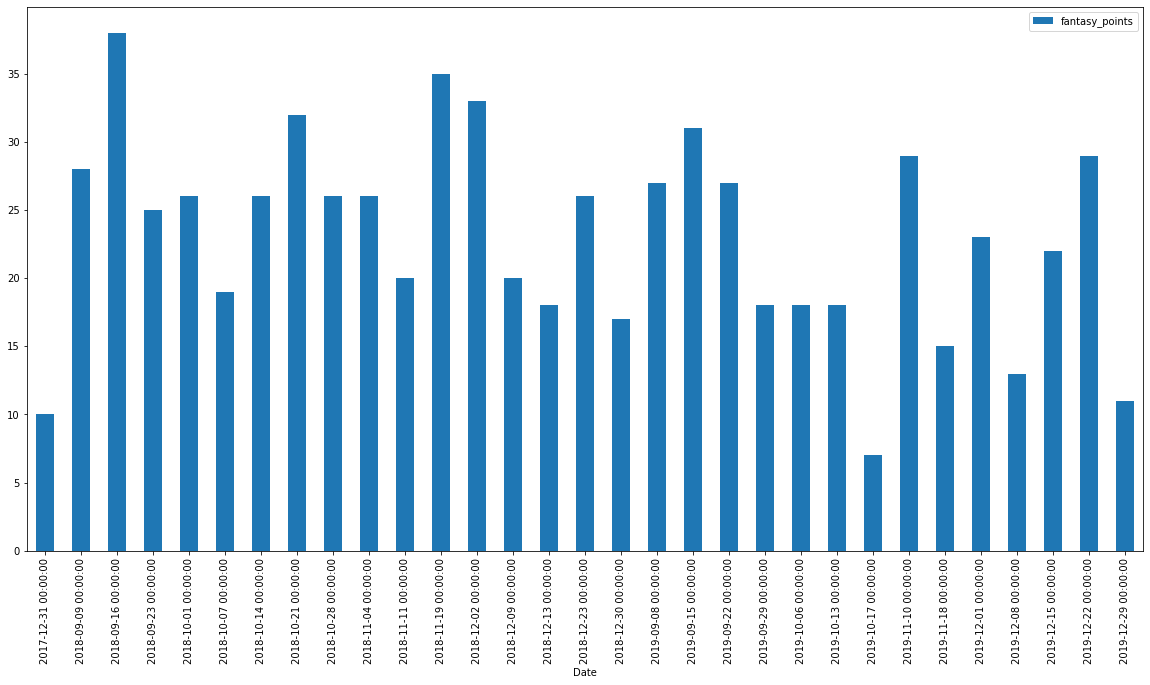

In [12]:
y = mahomes['fantasy_points']
x = mahomes['Date']
mahomes.plot(kind='bar', x='Date', y='fantasy_points', figsize=(20,10))

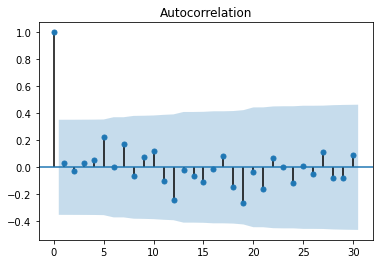

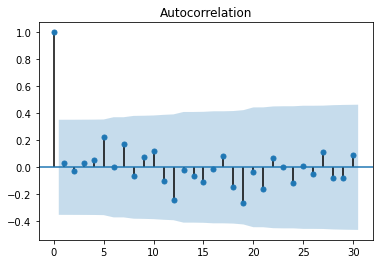

In [13]:
plot_acf(mahomes['fantasy_points'], lags=30)

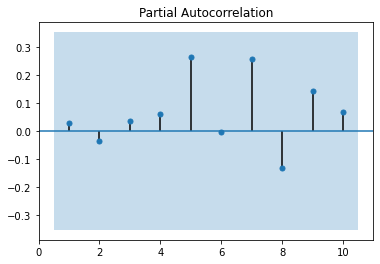

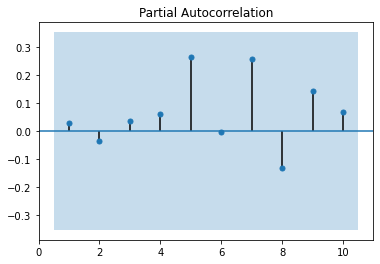

In [14]:
plot_pacf(mahomes['fantasy_points'], zero=False, lags=10)

In [49]:
#mahomes clearly does not have enough data points to properly use any auto correlation/regression statistical measurements

In [47]:
# I shall come back to figure this out
def qb_df(key):
    players = []
    for key, value in top_20.items():
        key = qb.loc[value, :]
        key['Date'] = pd.to_datetime(key.Date)
        key.sort_values(by=['Date'], inplace=True)
        players.append(key)
    return players

In [48]:
qb_df(rodgers)

C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\andre\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[                Pos  Year  Week Team Opponent Abbrev       Date H/A   OT  \
 Player                                                                     
 Patrick Mahomes  QB  2017    17  KAN             DEN 2017-12-31   A  NaN   
 Patrick Mahomes  QB  2018     1  KAN             LAC 2018-09-09   A  NaN   
 Patrick Mahomes  QB  2018     2  KAN             PIT 2018-09-16   A  NaN   
 Patrick Mahomes  QB  2018     3  KAN             SFO 2018-09-23   H  NaN   
 Patrick Mahomes  QB  2018     4  KAN             DEN 2018-10-01   A  NaN   
 Patrick Mahomes  QB  2018     5  KAN             JAX 2018-10-07   H  NaN   
 Patrick Mahomes  QB  2018     6  KAN             NWE 2018-10-14   A  NaN   
 Patrick Mahomes  QB  2018     7  KAN             CIN 2018-10-21   H  NaN   
 Patrick Mahomes  QB  2018     8  KAN             DEN 2018-10-28   H  NaN   
 Patrick Mahomes  QB  2018     9  KAN             CLE 2018-11-04   A  NaN   
 Patrick Mahomes  QB  2018    10  KAN             ARI 2018-11-11   H  NaN   

In [ ]:
def arima_qb(qb_df):
    for key in qb_df:
        